In [120]:
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [56]:
# Carga la base de datos desde un archivo csv
df = pd.read_csv('data_limpio.csv')
df

,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,repaglinide,glipizide,insulin,count_No,count_Steady,count_Down,count_Up,change,diabetesMed,readmitted
0,1,Emergency,Discharged to home,Referral,1,41,0,1,0,0,...,No,No,No,4,0,0,0,No,No,NO
1,2,Emergency,Discharged to home,Emergency Room,3,59,0,18,0,0,...,No,No,Up,3,0,0,1,Ch,Yes,NO
2,3,Emergency,Discharged to home,Emergency Room,2,11,5,13,2,0,...,No,Steady,No,3,1,0,0,No,Yes,NO
3,4,Emergency,Discharged to home,Emergency Room,2,44,1,16,0,0,...,No,No,Up,3,0,0,1,Ch,Yes,NO
4,5,Emergency,Discharged to home,Emergency Room,1,51,0,8,0,0,...,No,Steady,Steady,2,2,0,0,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,8,Emergency,Discharged/Transferred,Emergency Room,3,51,0,16,0,0,...,No,No,Down,2,1,1,0,Ch,Yes,NO
101762,9,Emergency,Discharged/Transferred,Transfer,5,33,3,18,0,0,...,No,No,Steady,3,1,0,0,No,Yes,NO
101763,8,Emergency,Discharged to home,Emergency Room,1,53,0,9,1,0,...,No,No,Down,2,1,1,0,Ch,Yes,NO
101764,9,Urgent,Discharged/Transferred,Emergency Room,10,45,2,21,0,0,...,No,Steady,Up,2,1,0,1,Ch,Yes,NO


In [57]:
# Muestra los valores unicos de la columna que sera el target
valores_unicos = df['readmitted'].unique()
valores_unicos

array(['NO', '<30'], dtype=object)

In [58]:
# Reemplazar 'NO' por 0 y cualquier otro valor por 1
df['readmitted'] = df['readmitted'].replace({'NO': 0, '<30': 1})

# Elimina las columnas raras del dataframe
rare_cols = ['count_No', 'count_Steady', 'count_Up', 'count_Down']
df = df.drop(rare_cols, axis=1)

C:\Users\Guille\AppData\Local\Temp\ipykernel_5972\4008037227.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['readmitted'] = df['readmitted'].replace({'NO': 0, '<30': 1})


In [59]:
df

,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,glipizide,insulin,change,diabetesMed,readmitted
0,1,Emergency,Discharged to home,Referral,1,41,0,1,0,0,...,1,NaN,NaN,No,No,No,No,No,No,0
1,2,Emergency,Discharged to home,Emergency Room,3,59,0,18,0,0,...,9,NaN,NaN,No,No,No,Up,Ch,Yes,0
2,3,Emergency,Discharged to home,Emergency Room,2,11,5,13,2,0,...,6,NaN,NaN,No,No,Steady,No,No,Yes,0
3,4,Emergency,Discharged to home,Emergency Room,2,44,1,16,0,0,...,7,NaN,NaN,No,No,No,Up,Ch,Yes,0
4,5,Emergency,Discharged to home,Emergency Room,1,51,0,8,0,0,...,5,NaN,NaN,No,No,Steady,Steady,Ch,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,8,Emergency,Discharged/Transferred,Emergency Room,3,51,0,16,0,0,...,9,NaN,>8,Steady,No,No,Down,Ch,Yes,0
101762,9,Emergency,Discharged/Transferred,Transfer,5,33,3,18,0,0,...,9,NaN,NaN,No,No,No,Steady,No,Yes,0
101763,8,Emergency,Discharged to home,Emergency Room,1,53,0,9,1,0,...,13,NaN,NaN,Steady,No,No,Down,Ch,Yes,0
101764,9,Urgent,Discharged/Transferred,Emergency Room,10,45,2,21,0,0,...,9,NaN,NaN,No,No,Steady,Up,Ch,Yes,0


In [65]:
df.shape

(101766, 24)

In [72]:
# Selecciona automáticamente las columnas categóricas del DataFrame
categorical_columns = df.select_dtypes(include=['object']).columns

# Realiza codificación one-hot manualmente para cada columna categórica
encoded_columns = pd.get_dummies(df[categorical_columns])

# Convierte las columnas codificadas one-hot en valores numéricos
encoded_columns = encoded_columns.astype(int)

# Concatena las columnas codificadas one-hot con el DataFrame original
df_encoded = pd.concat([df.drop(columns=categorical_columns), encoded_columns], axis=1)

df_encoded

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,...,glipizide_Steady,glipizide_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,1,1,41,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,1,0
1,2,3,59,0,18,0,0,0,9,0,...,0,0,0,0,0,1,1,0,0,1
2,3,2,11,5,13,2,0,1,6,0,...,1,0,0,1,0,0,0,1,0,1
3,4,2,44,1,16,0,0,0,7,0,...,0,0,0,0,0,1,1,0,0,1
4,5,1,51,0,8,0,0,0,5,0,...,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,8,3,51,0,16,0,0,0,9,0,...,0,0,1,0,0,0,1,0,0,1
101762,9,5,33,3,18,0,0,1,9,0,...,0,0,0,0,1,0,0,1,0,1
101763,8,1,53,0,9,1,0,0,13,0,...,0,0,1,0,0,0,1,0,0,1
101764,9,10,45,2,21,0,0,1,9,0,...,1,0,0,0,0,1,1,0,0,1


In [73]:
# Define las features y la variable target
X = df_encoded.drop('readmitted', axis=1)  # Features
y = df_encoded['readmitted']  # Target variable

In [74]:
# Separa los datos de entrenamiento y evaulacion
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

Creacion del modelo

In [79]:
# Funcion que crea el modelo de ML con Keras
def build_model(n_neurons=5,input_shape=(101,)):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(n_neurons, activation='relu', input_shape=input_shape))
  model.add(keras.layers.Dense(n_neurons, activation='relu' ))
  model.add(keras.layers.Dense(1, activation='sigmoid'))
  model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [80]:
# Crea un clasificador de Keras que es compatible con scikit-learn
keras_cs = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, epochs=100, validation_split=0.2)

C:\Users\Guille\AppData\Local\Temp\ipykernel_5972\391428922.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_cs = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, epochs=100, validation_split=0.2)


In [81]:
# Crea un pipeline en scikit-learn. Un pipeline es una secuencia de transformaciones y un estimador final. 
model =  Pipeline([
                   ('scale', StandardScaler()), ('ann', keras_cs)
])

In [82]:
# Inicia el entrenamiento del modelo de keras
model.fit(X_train,y_train)

Epoch 1/100
2036/2036 [==============================] - 3s 1ms/step - loss: 0.3800 - accuracy: 0.8858 - val_loss: 0.3424 - val_accuracy: 0.8922
Epoch 2/100
2036/2036 [==============================] - 2s 951us/step - loss: 0.3476 - accuracy: 0.8877 - val_loss: 0.3372 - val_accuracy: 0.8922
Epoch 3/100
2036/2036 [==============================] - 2s 951us/step - loss: 0.3434 - accuracy: 0.8877 - val_loss: 0.3346 - val_accuracy: 0.8922
Epoch 4/100
2036/2036 [==============================] - 2s 954us/step - loss: 0.3407 - accuracy: 0.8877 - val_loss: 0.3330 - val_accuracy: 0.8922
Epoch 5/100
2036/2036 [==============================] - 2s 954us/step - loss: 0.3389 - accuracy: 0.8877 - val_loss: 0.3318 - val_accuracy: 0.8922
Epoch 6/100
2036/2036 [==============================] - 2s 942us/step - loss: 0.3374 - accuracy: 0.8877 - val_loss: 0.3308 - val_accuracy: 0.8922
Epoch 7/100
2036/2036 [==============================] - 2s 943us/step - loss: 0.3362 - accuracy: 0.8877 - val_loss: 0.3

Pipeline(steps=[('scale', StandardScaler()),
                ('ann',
                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x00000132810AB5E0>)])

In [84]:
# Predice segun los datos de testeo e imprime los resultados
y_fit=model.predict(X_test)
print(classification_report(y_test,y_fit))

637/637 [==============================] - 0s 649us/step
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18069
           1       0.00      0.00      0.00      2285

    accuracy                           0.89     20354
   macro avg       0.44      0.50      0.47     20354
weighted avg       0.79      0.89      0.83     20354



c:\Users\Guille\anaconda3\envs\Nocountry_proyect_01\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Guille\anaconda3\envs\Nocountry_proyect_01\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Guille\anaconda3\envs\Nocountry_proyect_01\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [92]:
# Limpia el modelo anteior para liberar espacio en memoria
keras.backend.clear_session()

### Se procedera a buscar los mejores hiperparametros para el modelo

In [93]:
# Esta funcion crea un modelo de keras con hiperparametro especificos
def build_model(n_hidden=1, n_neurons=5,input_shape=(101,)):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(n_neurons, activation='relu', input_shape=input_shape))
  for i in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation='relu'))
  model.add(keras.layers.Dense(1, activation='sigmoid'))
  model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [94]:
keras_cs = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, epochs=50, verbose=0)

C:\Users\Guille\AppData\Local\Temp\ipykernel_5972\854310640.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_cs = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, epochs=50, verbose=0)


In [95]:
model =  Pipeline([
                   ('scale', StandardScaler()), ('ann', keras_cs)
])

In [96]:
# Diccionario con los hiperparametros a testear
params = {
    'ann__n_hidden':[0,1,2,3],
    'ann__n_neurons':np.arange(0,15),
    'ann__batch_size':[10,15,20]
}

In [97]:
rnd_search = RandomizedSearchCV(model, params, n_iter=10, cv=3, n_jobs=-1, verbose=2)

In [98]:
grid_result = rnd_search.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [99]:
grid_result.best_params_

{'ann__n_neurons': 7, 'ann__n_hidden': 1, 'ann__batch_size': 10}

In [100]:
sk_params = {
    'batch_size':grid_result.best_params_['ann__batch_size'],
    'n_hidden': grid_result.best_params_['ann__n_hidden'],
    'n_neurons':grid_result.best_params_['ann__n_neurons']
}

In [101]:
sk_params

{'batch_size': 10, 'n_hidden': 1, 'n_neurons': 7}

In [112]:
keras.backend.clear_session()

In [113]:
keras_cs = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, epochs=100, verbose=1, **sk_params )

C:\Users\Guille\AppData\Local\Temp\ipykernel_5972\2934572872.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_cs = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, epochs=100, verbose=1, **sk_params )


In [114]:
model =  Pipeline([
                   ('scale', StandardScaler()), ('ann', keras_cs)
])

In [115]:
model.fit(X_train,y_train)

Epoch 1/100
8142/8142 [==============================] - 7s 814us/step - loss: 0.3495 - accuracy: 0.8882
Epoch 2/100
8142/8142 [==============================] - 7s 809us/step - loss: 0.3360 - accuracy: 0.8886
Epoch 3/100
8142/8142 [==============================] - 6s 788us/step - loss: 0.3338 - accuracy: 0.8886
Epoch 4/100
8142/8142 [==============================] - 7s 808us/step - loss: 0.3326 - accuracy: 0.8886
Epoch 5/100
8142/8142 [==============================] - 7s 827us/step - loss: 0.3318 - accuracy: 0.8886
Epoch 6/100
8142/8142 [==============================] - 7s 814us/step - loss: 0.3311 - accuracy: 0.8886
Epoch 7/100
8142/8142 [==============================] - 6s 795us/step - loss: 0.3307 - accuracy: 0.8886
Epoch 8/100
8142/8142 [==============================] - 6s 790us/step - loss: 0.3304 - accuracy: 0.8886
Epoch 9/100
8142/8142 [==============================] - 7s 814us/step - loss: 0.3300 - accuracy: 0.8886
Epoch 10/100
8142/8142 [==============================]

Pipeline(steps=[('scale', StandardScaler()),
                ('ann',
                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x00000132B48ACE50>)])

637/637 [==============================] - 0s 640us/step
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18069
           1       0.00      0.00      0.00      2285

    accuracy                           0.89     20354
   macro avg       0.44      0.50      0.47     20354
weighted avg       0.79      0.89      0.83     20354



c:\Users\Guille\anaconda3\envs\Nocountry_proyect_01\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Guille\anaconda3\envs\Nocountry_proyect_01\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Guille\anaconda3\envs\Nocountry_proyect_01\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

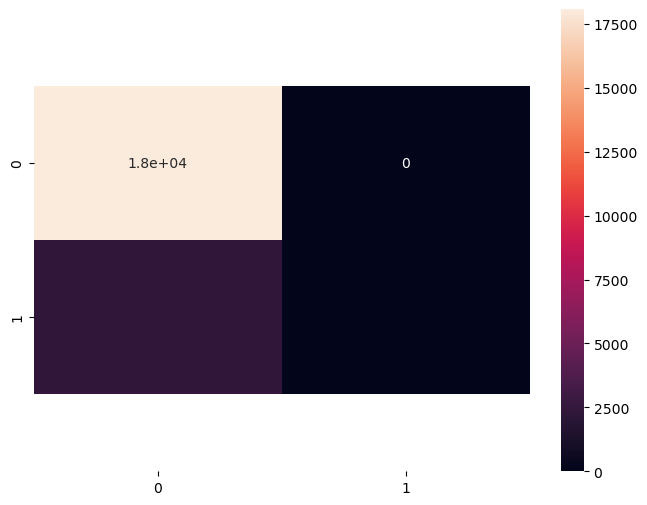

In [118]:
y_fit=model.predict(X_test)
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_fit), annot=True)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t)
print(classification_report(y_test,y_fit))